In [2]:
import numpy as np
import pandas as pd

In [3]:
col1 = ['a', 'b', 'c', 'a', 'b', 'c','a', 'b', 'c','a', 'b', 'c','a', 'b', 'c']
col2 = [2010,2010,2010,2011,2011,2011,2012,2012,2012,2013,2013,2013,2014,2014,2014]
col3 = np.random.rand(15)


In [4]:
df = pd.DataFrame({'letter':col1, 'year':col2, 'rand':col3})

In [5]:
df

,letter,rand,year
0,a,0.859444,2010
1,b,0.123980,2010
2,c,0.552761,2010
3,a,0.778744,2011
4,b,0.148489,2011
5,c,0.181528,2011
6,a,0.926887,2012
7,b,0.905370,2012
8,c,0.154208,2012
9,a,0.556607,2013


In [6]:
grouped = df.groupby('letter')

In [7]:
# a helper function to print the contents of the groups
def print_groups (groupobject):
    # loop over all groups, printing the group name 
    # and group details
    for name, group in groupobject:
        print ("Name: " + name)
        print (group)

In [8]:
print_groups(grouped)

Name: a
   letter      rand  year
0       a  0.859444  2010
3       a  0.778744  2011
6       a  0.926887  2012
9       a  0.556607  2013
12      a  0.664903  2014
Name: b
   letter      rand  year
1       b  0.123980  2010
4       b  0.148489  2011
7       b  0.905370  2012
10      b  0.201521  2013
13      b  0.914376  2014
Name: c
   letter      rand  year
2       c  0.552761  2010
5       c  0.181528  2011
8       c  0.154208  2012
11      c  0.643558  2013
14      c  0.773940  2014


In [9]:
grouped.groups

{'a': [0, 3, 6, 9, 12], 'b': [1, 4, 7, 10, 13], 'c': [2, 5, 8, 11, 14]}

In [10]:
grouped.size()

letter
a    5
b    5
c    5
dtype: int64

In [11]:
grouped.count()

,rand,year
letter,,
a,5,5
b,5,5
c,5,5


In [12]:
grouped.get_group('a')

,letter,rand,year
0,a,0.859444,2010
3,a,0.778744,2011
6,a,0.926887,2012
9,a,0.556607,2013
12,a,0.664903,2014


In [13]:
type(grouped.get_group('a'))

pandas.core.frame.DataFrame

In [14]:
groupa = grouped.get_group('a')
groupa[:3]

,letter,rand,year
0,a,0.859444,2010
3,a,0.778744,2011
6,a,0.926887,2012


In [15]:
grouped.head(2)

,letter,rand,year
0,a,0.859444,2010
1,b,0.123980,2010
2,c,0.552761,2010
3,a,0.778744,2011
4,b,0.148489,2011
5,c,0.181528,2011


In [16]:
grouped.nth(0)

,letter,rand,year
letter,,,
a,a,0.859444,2010
b,b,0.123980,2010
c,c,0.552761,2010


In [17]:
grouped.nth(2)

,letter,rand,year
letter,,,
a,a,0.926887,2012
b,b,0.905370,2012
c,c,0.154208,2012


In [18]:
grouped.agg(np.mean)

,rand,year
letter,,
a,0.757317,2012
b,0.458747,2012
c,0.461199,2012


In [19]:
groupedbyyear = df.groupby('year')
groupedbyyear.describe()

rand
year                
2010 count  3.000000
     mean   0.512062
     std    0.369417
     min    0.123980
     25%    0.338370
     50%    0.552761
     75%    0.706103
     max    0.859444
2011 count  3.000000
     mean   0.369587
     std    0.354725
     min    0.148489
     25%    0.165009
     50%    0.181528
     75%    0.480136
     max    0.778744
2012 count  3.000000
     mean   0.662155
     std    0.440027
     min    0.154208
     25%    0.529789
     50%    0.905370
     75%    0.916129
     max    0.926887
2013 count  3.000000
     mean   0.467229
     std    0.234180
     min    0.201521
     25%    0.379064
     50%    0.556607
     75%    0.600082
     max    0.643558
2014 count  3.000000
     mean   0.784406
     std    0.125065
     min    0.664903
     25%    0.719421
     50%    0.773940
     75%    0.844158
     max    0.914376

In [20]:
yearaverages = groupedbyyear.agg(np.mean)

In [21]:
yearaverages

,rand
year,
2010,0.512062
2011,0.369587
2012,0.662155
2013,0.467229
2014,0.784406


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

{'boxes': [<matplotlib.lines.Line2D at 0x10fe25ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x10fe39950>,
 'fliers': [<matplotlib.lines.Line2D at 0x10fe4ac50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10fe4a610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10fe25c10>,
  <matplotlib.lines.Line2D at 0x10fe39310>]}

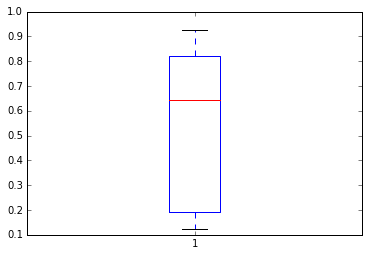

In [23]:
plt.boxplot(df.rand)

In [24]:
df[df.rand > 0.5]

,letter,rand,year
0,a,0.859444,2010
2,c,0.552761,2010
3,a,0.778744,2011
6,a,0.926887,2012
7,b,0.905370,2012
9,a,0.556607,2013
11,c,0.643558,2013
12,a,0.664903,2014
13,b,0.914376,2014
14,c,0.773940,2014


In [25]:
df1 = df[df.year > 2011]
df2 = df1[df1.year < 2015]
df2

,letter,rand,year
6,a,0.926887,2012
7,b,0.905370,2012
8,c,0.154208,2012
9,a,0.556607,2013
10,b,0.201521,2013
11,c,0.643558,2013
12,a,0.664903,2014
13,b,0.914376,2014
14,c,0.773940,2014


In [26]:
range(1830,2010,10)

[1830,
 1840,
 1850,
 1860,
 1870,
 1880,
 1890,
 1900,
 1910,
 1920,
 1930,
 1940,
 1950,
 1960,
 1970,
 1980,
 1990,
 2000]

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 7.,  6.,  3.,  1.,  4.,  5.,  9.,  5.,  3.,  7.]),
 array([  5.24001263e-04,   9.70568918e-02,   1.93589782e-01,
          2.90122673e-01,   3.86655564e-01,   4.83188454e-01,
          5.79721345e-01,   6.76254235e-01,   7.72787126e-01,
          8.69320016e-01,   9.65852907e-01]),
 <a list of 10 Patch objects>)

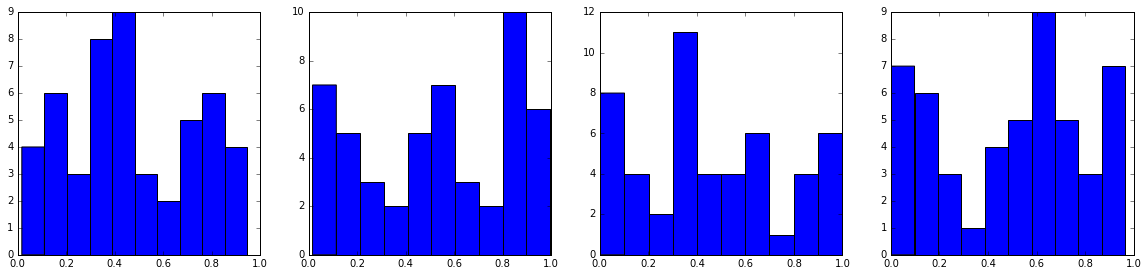

In [28]:
fig = plt.figure(figsize=(20,20))

a = fig.add_subplot(4,4,1)
a.hist(np.random.rand(50))

a = fig.add_subplot(4,4,2)
a.hist(np.random.rand(50))

a = fig.add_subplot(4,4,3)
a.hist(np.random.rand(50))

a = fig.add_subplot(4,4,4)
a.hist(np.random.rand(50))

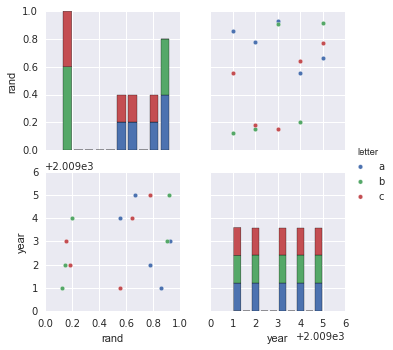

In [29]:
import seaborn
seaborn.pairplot(df, hue="letter", size=2.5)

Perform a [Mann-Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) on two standard normal distributions with a slight shift in one distribution.

(array([ 828.,  532.,  439.,  342.,  351.,  306.,  303.,  244.,  205.,
         239.,  218.,  207.,  208.,  178.,  217.,  173.,  192.,  211.,
         180.,  177.,  187.,  163.,  162.,  146.,  156.,  150.,  154.,
         142.,  137.,  122.,  147.,  139.,  144.,  117.,  130.,  146.,
         129.,  155.,  144.,  131.,  120.,  145.,  129.,  128.,  139.,
         120.,  144.,  153.,  128.,  143.]),
 array([  5.66303202e-06,   1.99860544e-02,   3.99664457e-02,
          5.99468370e-02,   7.99272283e-02,   9.99076196e-02,
          1.19888011e-01,   1.39868402e-01,   1.59848794e-01,
          1.79829185e-01,   1.99809576e-01,   2.19789968e-01,
          2.39770359e-01,   2.59750750e-01,   2.79731142e-01,
          2.99711533e-01,   3.19691924e-01,   3.39672315e-01,
          3.59652707e-01,   3.79633098e-01,   3.99613489e-01,
          4.19593881e-01,   4.39574272e-01,   4.59554663e-01,
          4.79535055e-01,   4.99515446e-01,   5.19495837e-01,
          5.39476229e-01,   5.59456620e-01

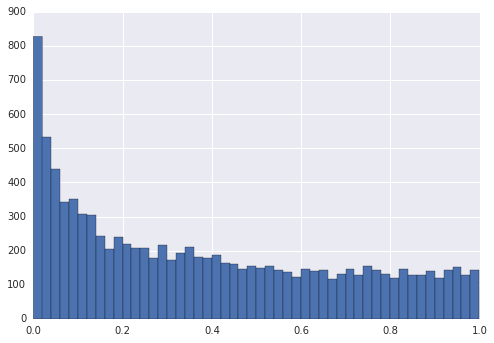

In [80]:
import scipy
out = 0
size = 100
trials = 10000
pvals = np.array([])
for i in range(trials):
    A = np.random.random(size)
    B = np.random.random(size) + 0.04
    # perform a Mann-Whitney U test
    s,p = scipy.stats.mannwhitneyu(A,B)
    pvals = np.append(pvals, p)
plt.hist(pvals, bins=50)


In [82]:
left = pd.DataFrame({'sam':[1,2,3,4,5], 'bob':[6,7,8,9,10], 'chuck':[11,12,13,14,15]},index=['A','B','C','D','E'])
left

,bob,chuck,sam
A,6,11,1
B,7,12,2
C,8,13,3
D,9,14,4
E,10,15,5


In [83]:
right = pd.DataFrame({'toby':[21,22,23,24,25], 'mia':[26,27,28,29,30], 'chiara':[11,12,13,14,15]},index=['A','B','C','D','E'])
right

,chiara,mia,toby
A,11,26,21
B,12,27,22
C,13,28,23
D,14,29,24
E,15,30,25


In [87]:
mg = pd.merge(left, right, left_index=True, right_index=True)
mg

,bob,chuck,sam,chiara,mia,toby
A,6,11,1,11,26,21
B,7,12,2,12,27,22
C,8,13,3,13,28,23
D,9,14,4,14,29,24
E,10,15,5,15,30,25


In [98]:
start = pd.datetime(2011, 1, 1)
end = pd.datetime(2012, 1, 1)
rng = pd.date_range(start, end)
rng.day.size


366

In [104]:
bd = pd.to_datetime(1967*10000 + 4*100 + 5, format='%Y%m%d')
dd = pd.to_datetime(2033*10000 + 7*100 + 23, format='%Y%m%d')
lifespan = dd - bd

In [106]:
lifespan.days

24216

In [125]:
newdf = pd.DataFrame({'x':np.linspace(0.0,99.9,1000)})

In [131]:
newdf['noise1']=np.random.rand(1000)
newdf['noise2']=np.random.rand(1000)
newdf['y'] = newdf.x * (3 + newdf.noise1) + 5 * newdf.noise2 + newdf.x2
newdf['x2'] = newdf.x + newdf.noise1 * 4


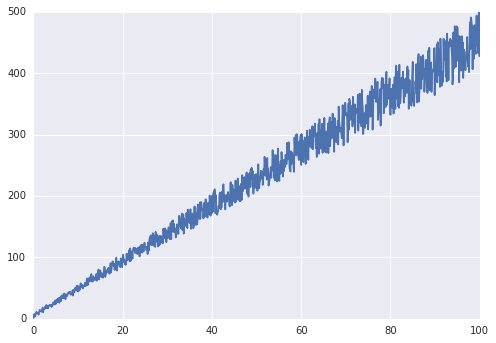

In [132]:
plt.plot(newdf.x, newdf.y)

In [133]:
import statsmodels.api as sm

y = newdf.y

x = [
     newdf.x,
     newdf.x2,
     ]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

In [134]:
print reg_m(y, x).summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.189e+05
Date:                Fri, 26 Feb 2016   Prob (F-statistic):               0.00
Time:                        15:58:21   Log-Likelihood:                -3558.2
No. Observations:                1000   AIC:                             7122.
Df Residuals:                     997   BIC:                             7137.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            12.3518      0.234     52.768      0.0